In [1]:
from algorithm.utils.data.tf.dataimage import DataImage
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import keras
%load_ext tensorboard

In [2]:
dataset = DataImage(data_path="Input/dataset", split=0.2, resize=True, height='auto', width='auto', normalize=True, mean='auto', name="Electronic components dataset", batch_size=16)

In [3]:
dataset

Electronic components dataset
	Number of points: 2884
	Root location: Input/dataset
	Split: 0.2
	Transform used:	Resize(size=(128, 128)
	Normalize(mean=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098], std=None)


In [4]:
trainset = dataset.get_set(split="train")
validset = dataset.get_set(split="validation")

In [5]:
# get some random training images
dataiter = iter(trainset)
images, labels = next(dataiter)

In [6]:
images

{'data': <tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
 array([[[[0.1307598 , 0.18174021, 0.11115197],
          [0.14485295, 0.19583334, 0.12524511],
          [0.13725491, 0.18823531, 0.11764707],
          ...,
          [0.18541524, 0.2520819 , 0.1775721 ],
          [0.16597734, 0.232644  , 0.16989891],
          [0.12156864, 0.18823531, 0.1254902 ]],
 
         [[0.13725491, 0.18823531, 0.11764707],
          [0.13725491, 0.18823531, 0.11764707],
          [0.13051471, 0.18149512, 0.11090687],
          ...,
          [0.13244486, 0.19911154, 0.12460172],
          [0.1254902 , 0.17254902, 0.11764707],
          [0.11437893, 0.16143776, 0.10653579]],
 
         [[0.13725491, 0.18823531, 0.11764707],
          [0.13725491, 0.18823531, 0.11764707],
          [0.13051471, 0.18149512, 0.11090687],
          ...,
          [0.15113358, 0.21780026, 0.14329045],
          [0.14106494, 0.18812376, 0.1332218 ],
          [0.129643  , 0.17670181, 0.12179985]],
 
         ...,


In [7]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'Tantalum capacitor', b'Not mounted', b'Rectangular pin',
       b'Inductor', b'LED', b'Resistor', b'Ceramic capacitor',
       b'Connector', b'Resistor', b'Resistor', b'Rectangular pin',
       b'Ceramic capacitor', b'Ceramic capacitor', b'Not mounted',
       b'Rectangular pin', b'Resistor'], dtype=object)>

In [8]:
class_names = dataset.labels

In [9]:
class_names

['Ceramic capacitor',
 'Connector',
 'Diode',
 'Dip Switch',
 'Fuse',
 'IC',
 'Inductor',
 'Jumper',
 'Jumper cut',
 'LED',
 'Minimelf',
 'Not mounted',
 'Optoisolator',
 'Oscillator',
 'Pushbutton',
 'Rectangular pin',
 'Relais',
 'Resistor',
 'Resistor Network',
 'SOT',
 'TO252',
 'Tantalum capacitor']

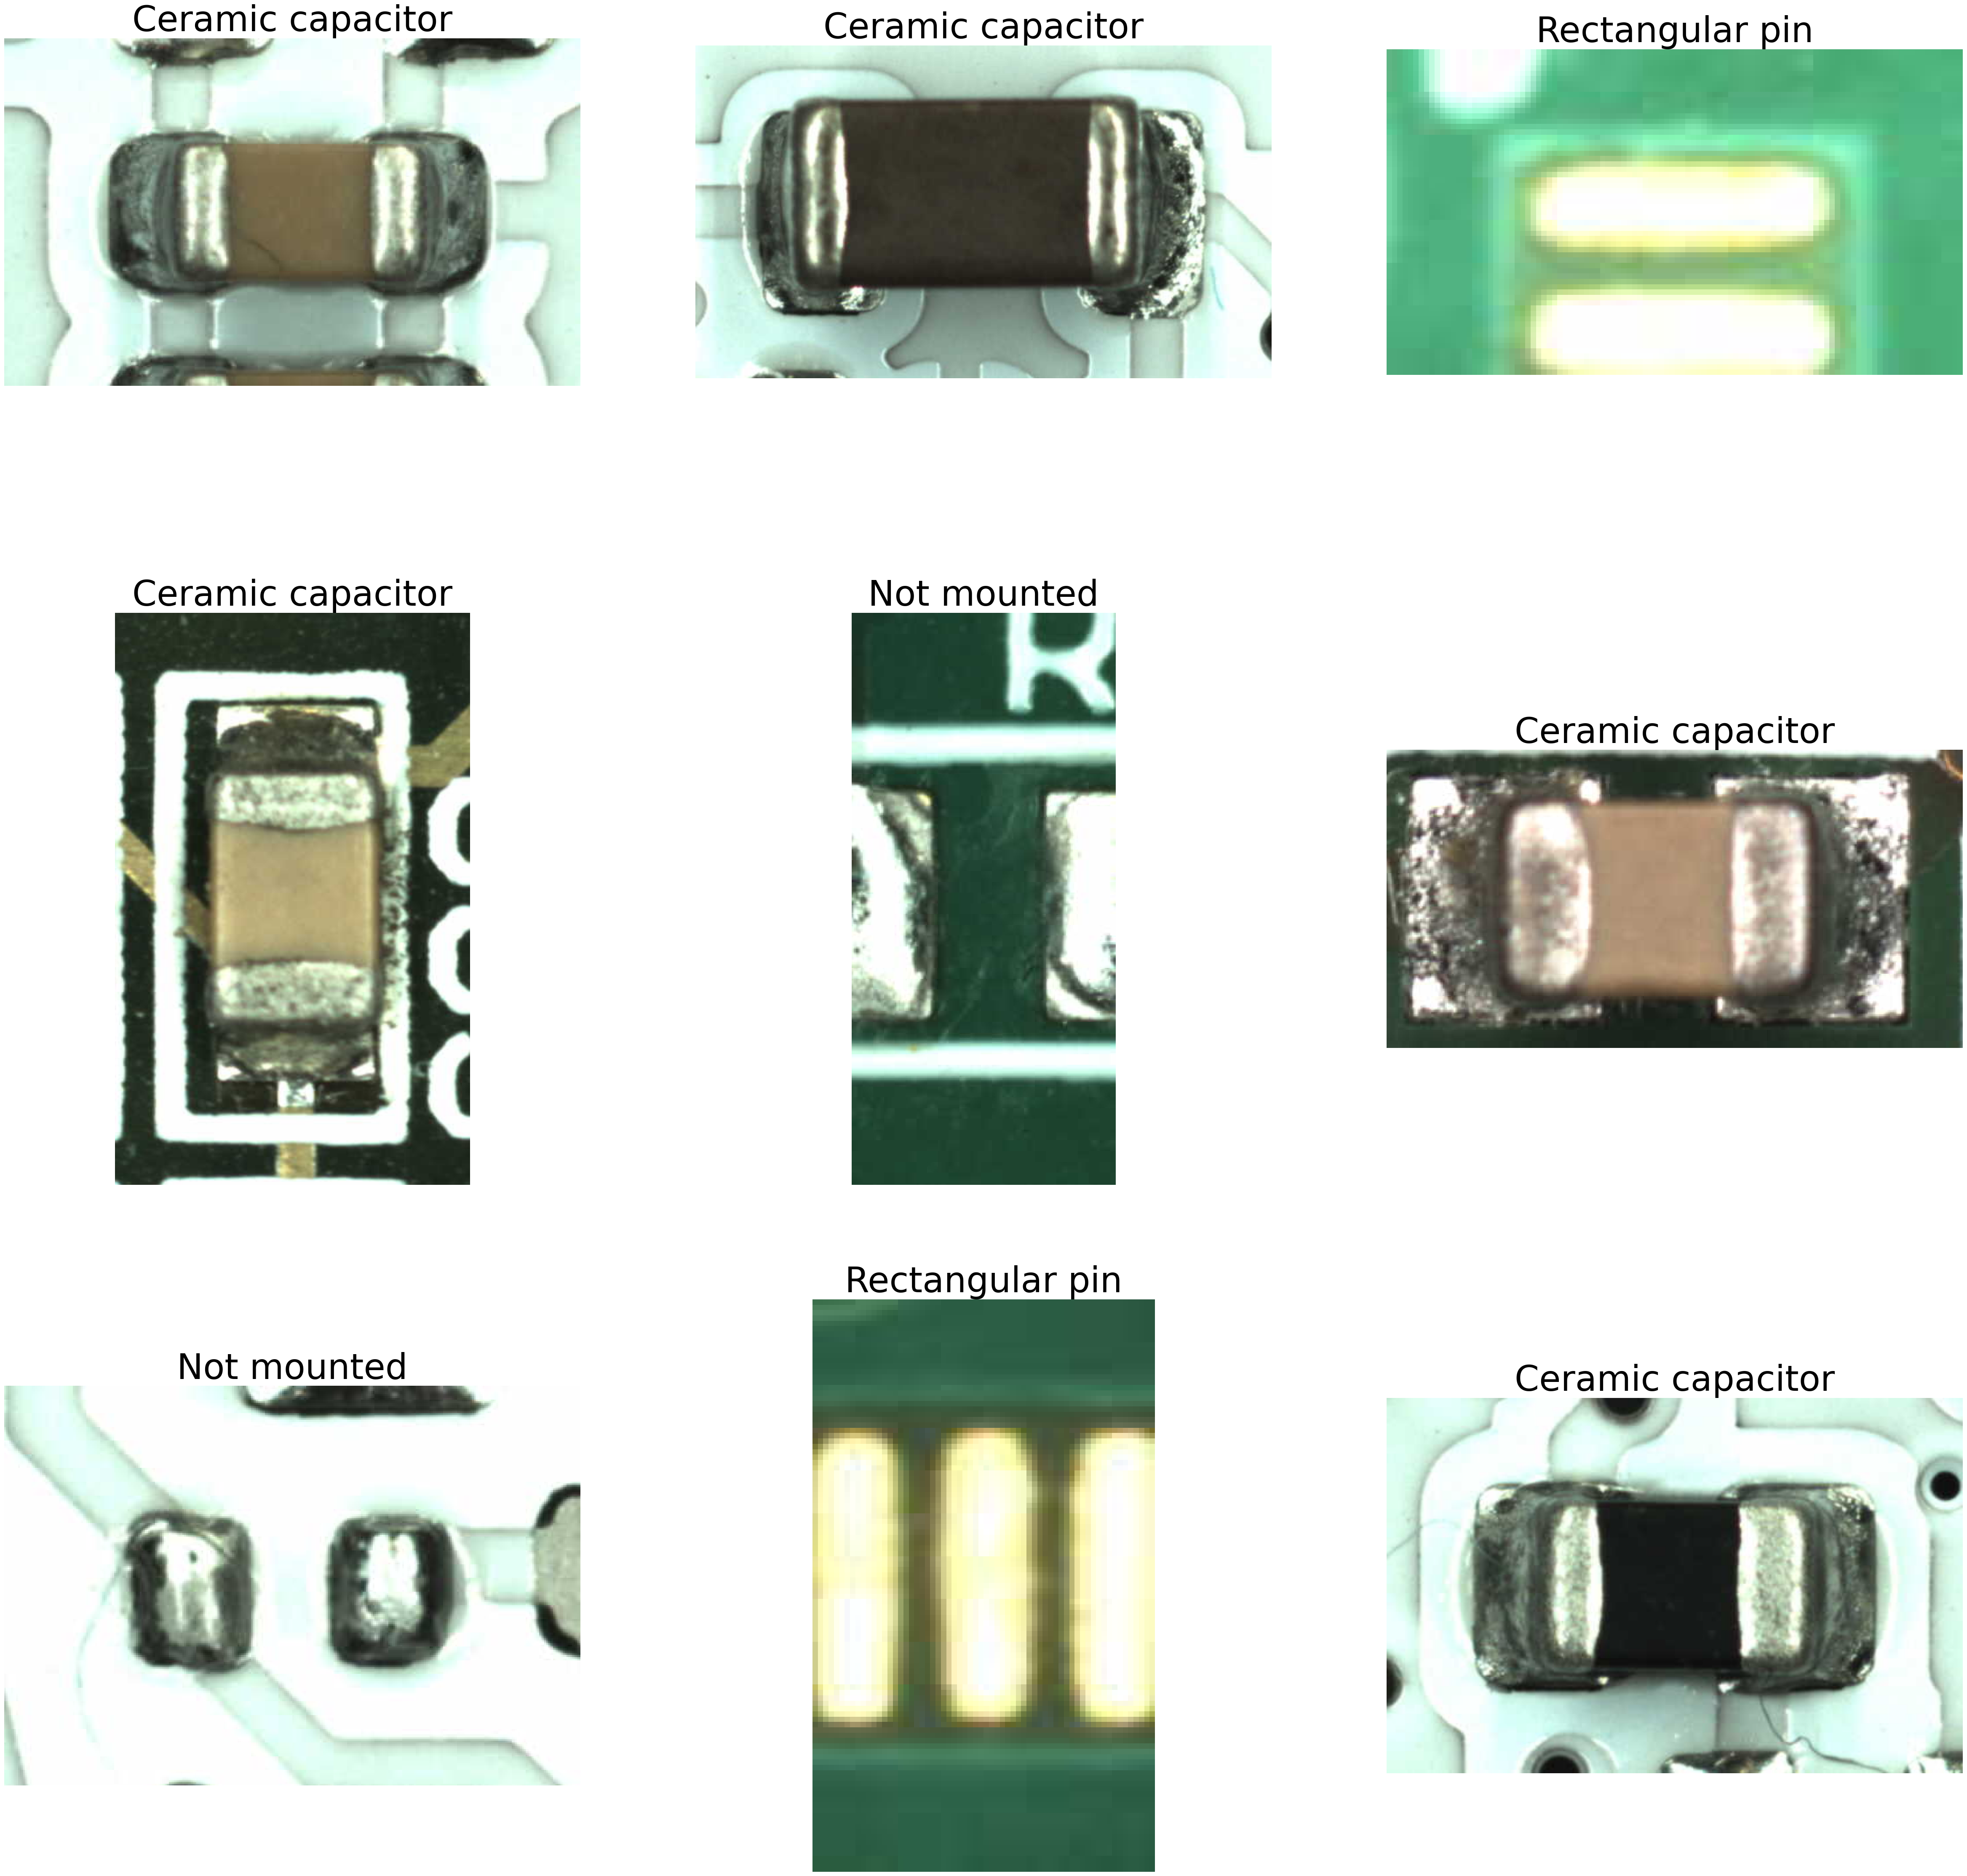

In [10]:
import matplotlib.pyplot as plt
import numpy as np
image_batch, label_batch = next(iter(trainset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    printable_object = dataset.print_item(image_batch['print_object'][i])
    plt.imshow(printable_object)
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [11]:
from algorithm.deep.tf.neural_networks import ResNet2__0

In [12]:
trainset = dataset.apply_one_hot_encoding(trainset)
validset = dataset.apply_one_hot_encoding(validset)

In [13]:
out_dir = "out/models/ResNet2__0_2_1"

In [14]:
from algorithm.utils.params.tf.dr import DomainRandomization_parameters
d_r = DomainRandomization_parameters()
d_r.set_factors(factors=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])
d_r.set_multivariatenormal_params(
    mean_vector=[0, 1.25, 0.5, 0.5, 0, 60, 1.25],
    variancecovariance_matrix=[
        [0.15, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0.1, 0, 0, 0, 0],
        [0, 0, 0, 0.1, 0, 0, 0],
        [0, 0, 0, 0, 0.15, 0, 0],
        [0, 0, 0, 0, 0, 25, 0],
        [0, 0, 0, 0, 0, 0, 1.125]
    ]
)

In [15]:
model = ResNet2__0(len(class_names),input_shape=(128, 128, 3), field='data', domain_randomization=d_r)
tb_callback = keras.callbacks.TensorBoard(log_dir=f'{out_dir}/tensorboard_log', histogram_freq=1)

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
    run_eagerly=True,
)

In [17]:
tf.get_logger().setLevel('ERROR')

model.fit(trainset, validation_data=validset, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
145/145 [==============================] - 138s 727ms/step - loss: 2.9765 - accuracy: 0.5875 - val_loss: 5.9790 - val_accuracy: 0.1684
Epoch 2/1000
145/145 [==============================] - 98s 672ms/step - loss: 0.9685 - accuracy: 0.7431 - val_loss: 6.4942 - val_accuracy: 0.0278
Epoch 3/1000
145/145 [==============================] - 98s 675ms/step - loss: 0.9788 - accuracy: 0.7617 - val_loss: 76.2027 - val_accuracy: 0.1684
Epoch 4/1000
145/145 [==============================] - 97s 665ms/step - loss: 0.8688 - accuracy: 0.7569 - val_loss: 2.1751 - val_accuracy: 0.2743
Epoch 5/1000
145/145 [==============================] - 97s 665ms/step - loss: 1.1257 - accuracy: 0.7080 - val_loss: 2.9288 - val_accuracy: 0.1736
Epoch 6/1000
145/145 [==============================] - 97s 665ms/step - loss: 0.7410 - accuracy: 0.7886 - val_loss: 1.5273 - val_accuracy: 0.6198
Epoch 7/1000
145/145 [==============================] - 97s 667ms/step - loss: 0.5147 - accuracy: 0.8536 - val_loss:

In [18]:
model.summary()

Model: "res_net2__0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 4, 4, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1000)              32769000  
                                                                 
 dense_1 (Dense)             (None, 22)                22022     
                                                                 
 model (Functional)          (None, 22)                91161966  
                                                                 
 random_parameters (RandomP  multiple                  0         
 arameters)                                                      
                                                       

In [ ]:
model.save(out_dir)

In [ ]:
keras.utils.plot_model(model, f'{out_dir}/ResNet2__0_2_1.svg', show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [ ]:
# Evaluation on unseen data.


test_loss, test_acc = model.evaluate(validset, verbose=2)
print('\nTest accuracy:', test_acc)